In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# **Data Cleaning and Exploratory Data Analysis (EDA).**

In [2]:
# read Yelp Reviews Dataset from sharing drive link

url = 'https://drive.google.com/file/d/1pjidW7dK76vuDUjSCM2yfk_Aa6sdMd5T/view?usp=sharing'

# Extract the file ID from the URL
file_id = url.split('/')[-2]

# Construct the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# Read the CSV from the download URL
Data = pd.read_csv(download_url)

Data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [3]:
# Check dataset structure
print (Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB
None


In [4]:
# Dropping unnecessary columns
Data = Data.drop(['business_id', 'review_id', 'type', 'user_id'], axis=1)

In [5]:
#Check for null values
print(Data.isnull().sum())

date      0
stars     0
text      0
cool      0
useful    0
funny     0
dtype: int64


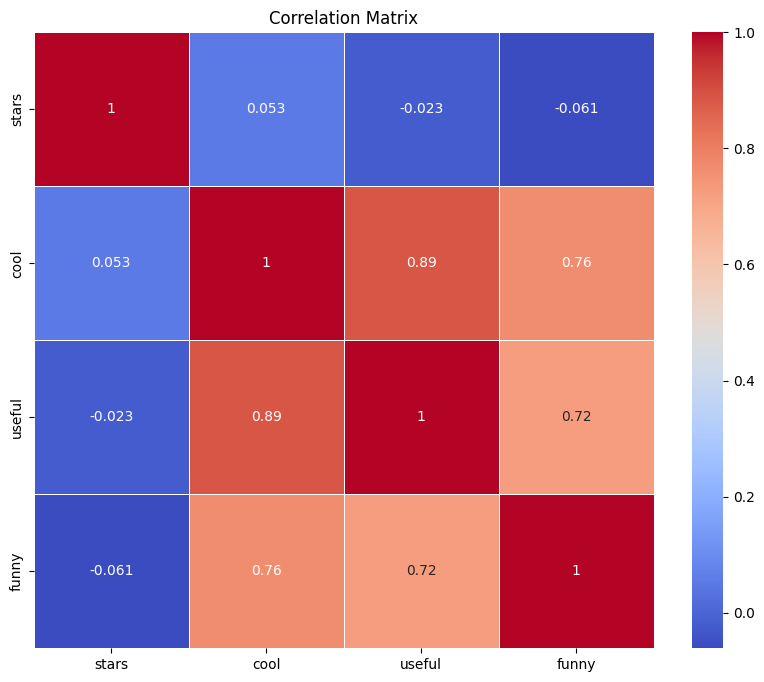

In [6]:
# Calculate correlation matrix for numeric columns only
correlation_matrix = Data.select_dtypes(include=['number']).corr()

# Visualize the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Dropping Highly Correlated Features to avoid redundancy.
Data = Data.drop(['cool'], axis=1)

In [8]:
# Check remaining columns
print(Data.columns)

Index(['date', 'stars', 'text', 'useful', 'funny'], dtype='object')


In [9]:
print(f"Dataset shape after cleaning: {Data.shape}")


Dataset shape after cleaning: (10000, 5)


In [10]:
# checking for duplicate rows
duplicate_rows = Data[Data.duplicated(keep=False)]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print("Duplicate Rows:")
print(duplicate_rows)

# Drop duplicate rows, keeping the first occurrence
Data = Data.drop_duplicates(keep='first')

# Print the shape of the DataFrame after removing duplicates
print(f"Dataset shape after removing duplicates: {Data.shape}")


Number of duplicate rows: 2
Duplicate Rows:
            date  stars                                               text  \
4372  2012-06-16      2  This review is for the chain in general. The l...   
9680  2012-06-16      2  This review is for the chain in general. The l...   

      useful  funny  
4372       0      0  
9680       0      0  
Dataset shape after removing duplicates: (9999, 5)


In [11]:
# Get basic descriptive statistics
print("\nDescriptive statistics:")
print(Data.describe())


Descriptive statistics:
             stars       useful        funny
count  9999.000000  9999.000000  9999.000000
mean      3.777678     1.409441     0.701370
std       1.214567     2.336721     1.908024
min       1.000000     0.000000     0.000000
25%       3.000000     0.000000     0.000000
50%       4.000000     1.000000     0.000000
75%       5.000000     2.000000     1.000000
max       5.000000    76.000000    57.000000


In [12]:
# Check final dataset structure
print(Data.info())
Data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    9999 non-null   object
 1   stars   9999 non-null   int64 
 2   text    9999 non-null   object
 3   useful  9999 non-null   int64 
 4   funny   9999 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 468.7+ KB
None


,date,stars,text,useful,funny
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,0
1,2011-07-27,5,I have no idea why some people give bad review...,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,0
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0


# **Data Preprocessing**

# **Data Cleaning**
First, we remove any irrelevant characters from the reviews, lowercase the text, remove stop words, and apply stemming to standardize the text data for machine learning and deep learning models.

In [13]:

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from textblob import TextBlob
nltk.download('stopwords')


stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")


# Slang dictionary to map common internet slang to formal words
slang_dict = {
    'luv': 'love',
    'u': 'you',
    'you can please everyone': 'you can’t please everyone',
    'griping': 'complaining',
    'PM': 'afternoon',
    'awesome': 'great',
    'pizza': 'popular Italian dish',
    'calzone': 'Italian folded pizza',
    'out the door': 'leaving',
    'good egg': 'good person',
    'box': 'pack/take home leftovers',
    'like I always say': 'as I usually say',
    ':^)': 'happy face',
    'pls': 'please',
    'thx': 'thanks',
    'btw': 'by the way',
    'gr8': 'great',
    'awsm': 'awesome',
    'idk': 'i don’t know',
    'omg': 'oh my god',
    'lol': 'laugh out loud',
    'rofl': 'rolling on the floor laughing',
    'brb': 'be right back',
    'b4': 'before',
    'bff': 'best friends forever',
    'afaik': 'as far as I know',
    'atm': 'at the moment',
    'cya': 'see you',
    'gtg': 'got to go',
    'imo': 'in my opinion',
    'imho': 'in my humble opinion',
    'lmao': 'laughing my ass off',
    'np': 'no problem',
    'smh': 'shaking my head',
    'tbh': 'to be honest',
    'ty': 'thank you',
    'yw': 'you’re welcome',
    'wanna': 'want to',
    'gonna': 'going to',
    'wut': 'what',
    'tgif': 'thank god it’s Friday',
    'irl': 'in real life',
    'jk': 'just kidding',
    'fyi': 'for your information',
    'hmu': 'hit me up',
    'ikr': 'I know, right',
    'nvm': 'never mind',
    'omw': 'on my way',
    'ppl': 'people',
    'rn': 'right now',
    'tho': 'though',
    'ttyl': 'talk to you later',
    'wyd': 'what are you doing',
    'wfh': 'work from home',
    'lmk': 'let me know',
    'bday': 'birthday',
    'msg': 'message',
    'xoxo': 'hugs and kisses',
    'dm': 'direct message',
    'bc': 'because',
    'thru': 'through',
    'ur': 'your/you are',
    'rly': 'really',
    'srsly': 'seriously',
    'afaik': 'as far as I know',
    'fomo': 'fear of missing out',
    'tldr': 'too long, didn’t read',
    'imo': 'in my opinion',
    'imho': 'in my humble opinion',
    'ikr': 'I know, right',
    'b/c': 'because',
    'cuz': 'because',
    'ftw': 'for the win',
    'ily': 'I love you',
    'tho': 'though',
    'prolly': 'probably',
    'omw': 'on my way',
    'rn': 'right now',
    'txt': 'text',
    'msg': 'message',
    'fam': 'family',
    'deets': 'details',
    'g2g': 'got to go',
    'jk': 'just kidding',
    'nbd': 'no big deal',
    'obv': 'obviously',
    'obvi': 'obviously',
    'ppl': 'people',
    'qotd': 'quote of the day',
    'rt': 'retweet',
    'tbh': 'to be honest',
    'tho': 'though',
    'wb': 'welcome back',
    'hbu': 'how about you',
    'yolo': 'you only live once',
    'fyi': 'for your information',
    'idc': 'I don’t care',
    'btw': 'by the way',
    'gg': 'good game',
    'np': 'no problem',
    'pls': 'please',
    'srsly': 'seriously',
    'ttyl': 'talk to you later',
    'v': 'very',
    'xoxo': 'hugs and kisses',
    'wyd': 'what are you doing',
    'sup': 'what’s up',
    'bruh': 'bro',
    'sis': 'sister',
    'asap': 'as soon as possible',
    'rn': 'right now',
    'tho': 'though',
    'wtf': 'what the fuck',
    'bday': 'birthday',
    'ikr': 'I know right',
    'lmfao': 'laughing my fucking ass off'
}

# Function to replace slang with formal words
def replace_slang(text):
    words = text.split()
    return ' '.join([slang_dict[word] if word in slang_dict else word for word in words])


# Clean reviews by removing special characters, lowercasing, removing stop words,Spelling correction, and stemming
# Full cleaning function
def clean_review(text):
    # Step 1: Spelling correction using TextBlob
   # text = str(TextBlob(text).correct())  # Correct misspellings

    # Step 2: Replace internet slang with formal words
    text = replace_slang(text)

    # Step 3: Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters

    # Step 4: Convert to lowercase
    text = text.lower()  # Lowercase all text

    # Step 5: Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stop words

    # Step 6: Apply stemming
    text = ' '.join([stemmer.stem(word) for word in text.split()])  # Stemming

    # Step 7: Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    return text

# Apply cleaning to the 'text' column
Data['cleaned_reviews'] = Data['text'].apply(clean_review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
Data.head()

,date,stars,text,useful,funny,cleaned_reviews
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,0,wife took birthday breakfast excel weather per...
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,idea peopl give bad review place goe show plea...
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,0,love gyro plate rice good also dig candi select
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,0,rosi dakota love chaparr dog park conveni surr...
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,general manag scott petello good egg go detail...


# **Exploratory Data Analysis (EDA)**
Before moving on to model training, it’s important to perform EDA to understand the data better. This includes word frequency distribution, review length distribution, and sentiment class distribution.

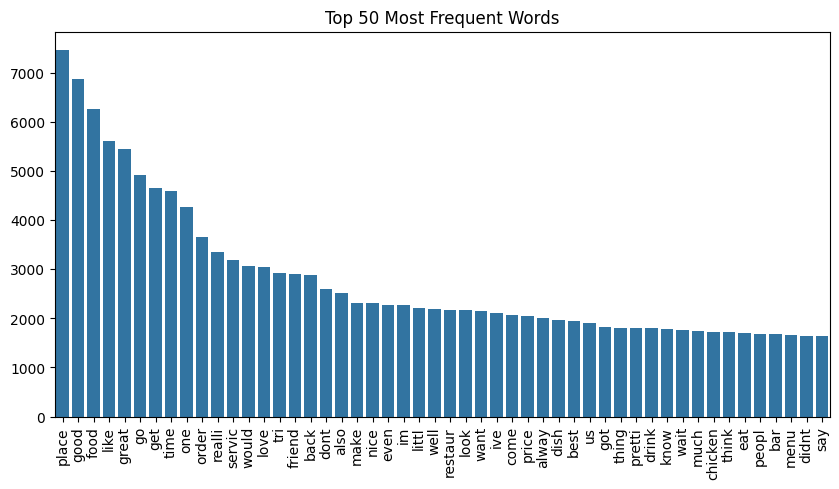

In [15]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Word frequency distribution
all_words = ' '.join(Data['cleaned_reviews']).split()
counter = Counter(all_words)
most_common_words = counter.most_common(50)

words, freq = zip(*most_common_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(freq))
plt.title('Top 50 Most Frequent Words')
plt.xticks(rotation=90)
plt.show()


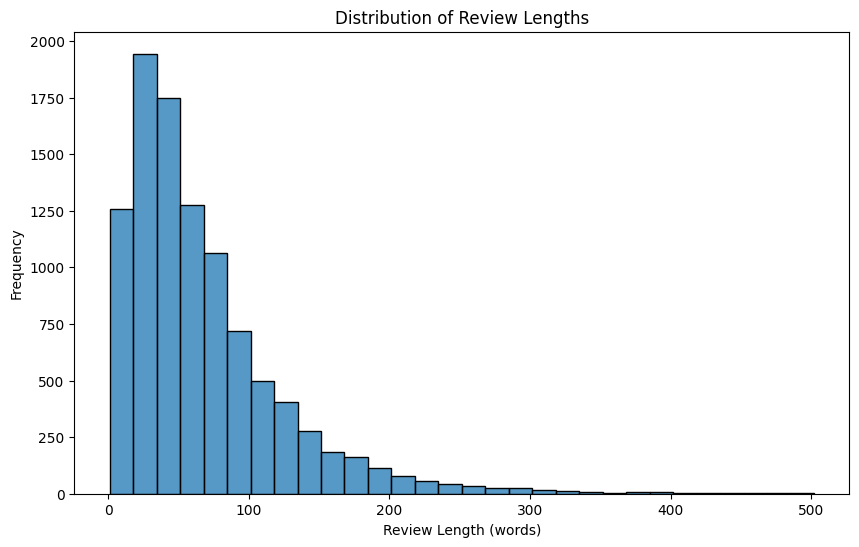

In [16]:
# Calculate the length of each review
review_length = Data['cleaned_reviews'].apply(lambda x: len(x.split()))

# Plot the review length distribution
plt.figure(figsize=(10,6))
sns.histplot(review_length, bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()


Sentiment Class Distribution:
stars
4    3526
5    3337
3    1461
2     926
1     749
Name: count, dtype: int64


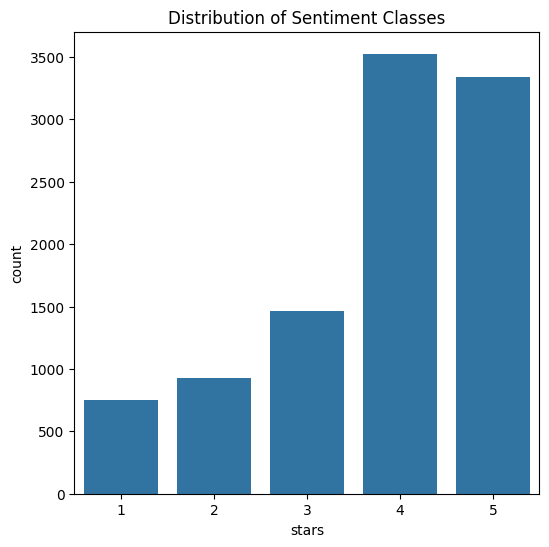

In [17]:
# Sentiment Class Distribution

print("Sentiment Class Distribution:")
print(Data['stars'].value_counts())
plt.figure(figsize=(6,6))
sns.countplot(x=Data['stars'])
plt.title('Distribution of Sentiment Classes')
plt.show()


# **Feature Engineering**
We can add additional features to enrich the dataset and provide more information for the models.

In [18]:
#Sentiment Scores

from textblob import TextBlob

# Add sentiment score as a feature
Data['sentiment_score'] = Data['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [19]:
Data.head()

,date,stars,text,useful,funny,cleaned_reviews,sentiment_score
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,0,wife took birthday breakfast excel weather per...,0.451515
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,idea peopl give bad review place goe show plea...,0.093750
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,0,love gyro plate rice good also dig candi select,0.600000
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,0,rosi dakota love chaparr dog park conveni surr...,0.422222
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,general manag scott petello good egg go detail...,0.370000


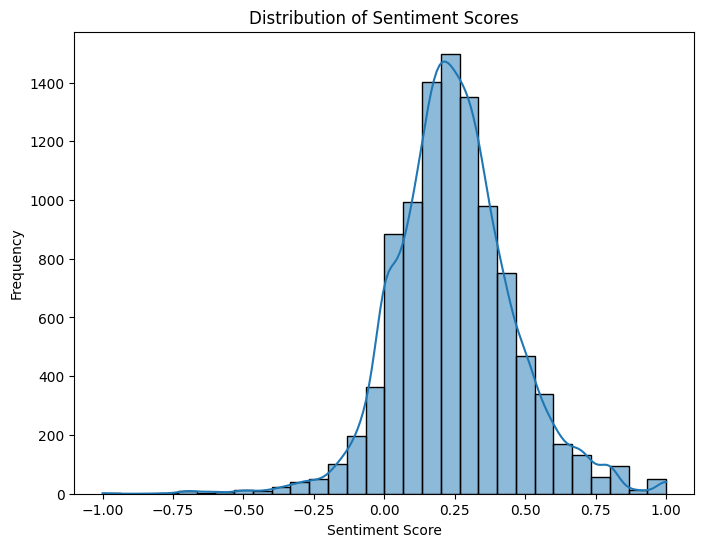

In [20]:

# Histogram of sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(Data['sentiment_score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Categorize sentiment scores into Positive, Neutral, and Negative
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

Data['sentiment_category'] = Data['sentiment_score'].apply(categorize_sentiment)

# Count the number of reviews in each category
sentiment_counts = Data['sentiment_category'].value_counts()
print(sentiment_counts)

sentiment_category
Positive    8916
Negative     817
Neutral      266
Name: count, dtype: int64


In [22]:
Data.head()

,date,stars,text,useful,funny,cleaned_reviews,sentiment_score,sentiment_category
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,0,wife took birthday breakfast excel weather per...,0.451515,Positive
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,idea peopl give bad review place goe show plea...,0.093750,Positive
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,0,love gyro plate rice good also dig candi select,0.600000,Positive
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,0,rosi dakota love chaparr dog park conveni surr...,0.422222,Positive
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,general manag scott petello good egg go detail...,0.370000,Positive


<ipython-input-23-47623b7f3675>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=Data, palette='coolwarm')


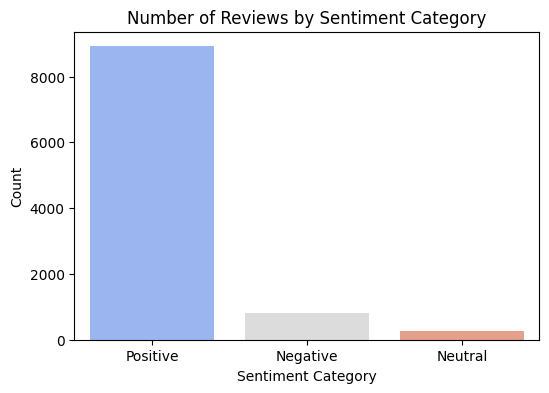

In [23]:
# Bar chart of sentiment categories
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment_category', data=Data, palette='coolwarm')
plt.title('Number of Reviews by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


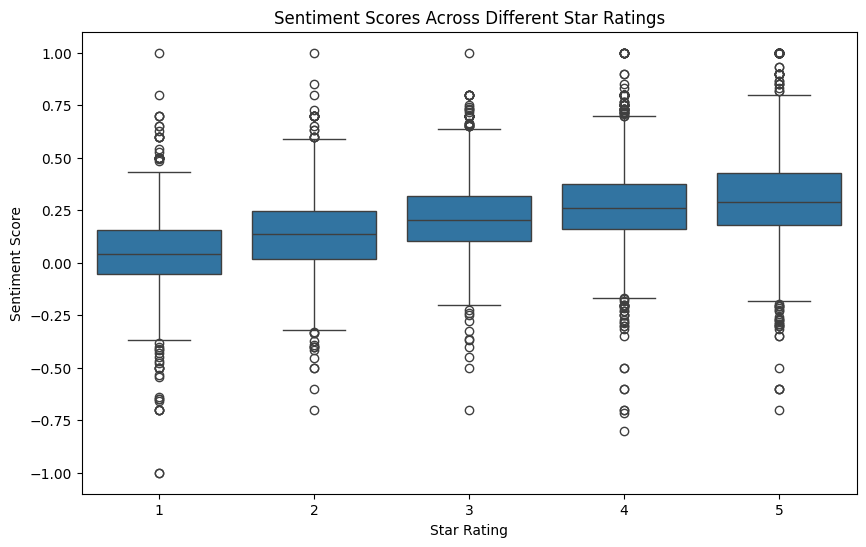

In [24]:
# Box plot to compare sentiment scores across star ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='sentiment_score', data=Data)
plt.title('Sentiment Scores Across Different Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Sentiment Score')
plt.show()


<ipython-input-25-7519d31c7587>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sentiment_over_time = Data.resample('M', on='date')['sentiment_score'].mean()


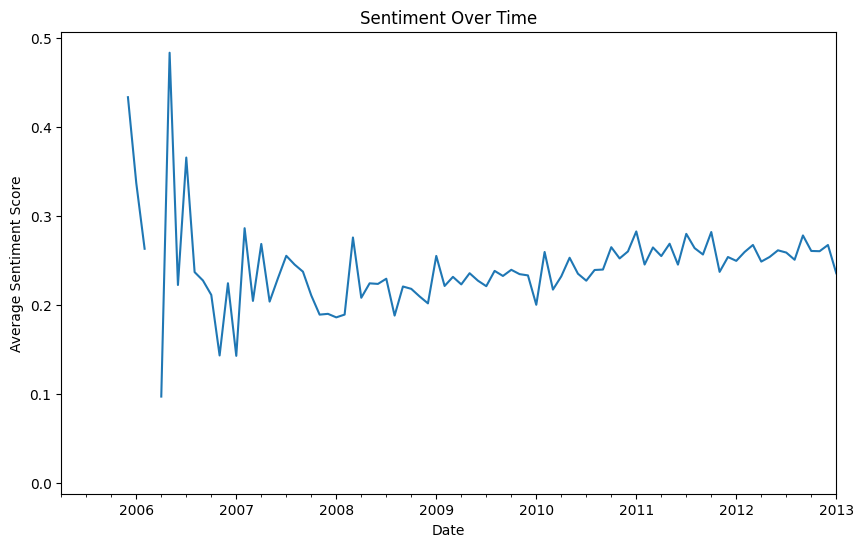

In [25]:
Data['date'] = pd.to_datetime(Data['date'])  # Ensure the date column is in datetime format

# Resample by month and calculate average sentiment score
sentiment_over_time = Data.resample('M', on='date')['sentiment_score'].mean()

# Plot sentiment over time
plt.figure(figsize=(10, 6))
sentiment_over_time.plot()
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.show()


In [26]:
# Correlation between sentiment and other features
correlation = Data[['sentiment_score', 'useful', 'funny']].corr()
print(correlation)


                 sentiment_score    useful     funny
sentiment_score         1.000000 -0.087117 -0.104228
useful                 -0.087117  1.000000  0.723402
funny                  -0.104228  0.723402  1.000000


In [27]:
# Add  character count features
Data['word_count'] = Data['cleaned_reviews'].apply(lambda x: len(x.split()))
Data['char_count'] = Data['cleaned_reviews'].apply(lambda x: len(x))
Data.head()

,date,stars,text,useful,funny,cleaned_reviews,sentiment_score,sentiment_category,word_count,char_count
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,0,wife took birthday breakfast excel weather per...,0.451515,Positive,81,492
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,idea peopl give bad review place goe show plea...,0.093750,Positive,135,798
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,0,love gyro plate rice good also dig candi select,0.600000,Positive,9,47
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,0,rosi dakota love chaparr dog park conveni surr...,0.422222,Positive,43,249
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,general manag scott petello good egg go detail...,0.370000,Positive,43,247


In [28]:
from collections import Counter

# Combine all cleaned reviews into a single string
all_reviews_text = ' '.join(Data['cleaned_reviews'])

# Split the string into words
words = all_reviews_text.split()

# Use Counter to count the frequency of each word
word_counts = Counter(words)

# Get the number of unique words
unique_word_count = len(word_counts)

print(f"The number of unique words in all cleaned reviews is: {unique_word_count}")


The number of unique words in all cleaned reviews is: 26903


# **Text Vectorization**
Convert the text data into numerical features using TF-IDF for machine learning models and word embeddings for deep learning models.

In [29]:
# TF-IDF for Machine Learning Models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
tfidf = TfidfVectorizer(max_features=5000,
                         ngram_range=(1, 2),  # Include unigrams and bigrams
                         min_df=5,  # Minimum document frequency
                         max_df=0.95,  # Maximum document frequency
                         sublinear_tf=True)  # Apply sublinear term frequency scaling

X_tfidf = tfidf.fit_transform(Data['cleaned_reviews']).toarray()
print(f"TF-IDF Shape: {X_tfidf.shape}")

# Normalize the TF-IDF matrix
X_tfidf= Normalizer().fit_transform(X_tfidf)

TF-IDF Shape: (9999, 5000)


In [30]:
 # Word Embeddings for Deep Learning Models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(Data['cleaned_reviews'])
sequences = tokenizer.texts_to_sequences(Data['cleaned_reviews'])
X_word_embeddings = pad_sequences(sequences, maxlen=100)  # Padding to max length of 100 words
print(X_word_embeddings.shape)

(9999, 100)


# **Machine Learning Models**

In [31]:

from sklearn.model_selection import train_test_split


# Replace stars this with  actual sentiment labels.
Data['sentiment'] = np.where(Data['stars'] > 3, 'positive', np.where(Data['stars'] < 3, 'negative', 'neutral'))

# Map sentiment to numerical values
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
Data['sentiment_num'] = Data['sentiment'].map(sentiment_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Data['sentiment_num'], test_size=0.2, random_state=42)

In [32]:
Data.head()

,date,stars,text,useful,funny,cleaned_reviews,sentiment_score,sentiment_category,word_count,char_count,sentiment,sentiment_num
0,2011-01-26,5,My wife took me here on my birthday for breakf...,5,0,wife took birthday breakfast excel weather per...,0.451515,Positive,81,492,positive,2
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,idea peopl give bad review place goe show plea...,0.093750,Positive,135,798,positive,2
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,1,0,love gyro plate rice good also dig candi select,0.600000,Positive,9,47,positive,2
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",2,0,rosi dakota love chaparr dog park conveni surr...,0.422222,Positive,43,249,positive,2
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,general manag scott petello good egg go detail...,0.370000,Positive,43,247,positive,2


In [33]:
from sklearn.linear_model import LogisticRegression
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time
from sklearn.model_selection import GridSearchCV

Training Logistic Regression...
Logistic Regression Accuracy: 0.7920
Logistic Regression Precision: 0.7627
Logistic Regression Recall: 0.7920
Logistic Regression F1 Score: 0.7609


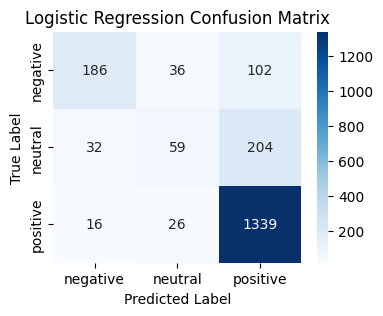

Time taken: 11.65 seconds

Training Decision Tree...
Decision Tree Accuracy: 0.6965
Decision Tree Precision: 0.6324
Decision Tree Recall: 0.6965
Decision Tree F1 Score: 0.6329


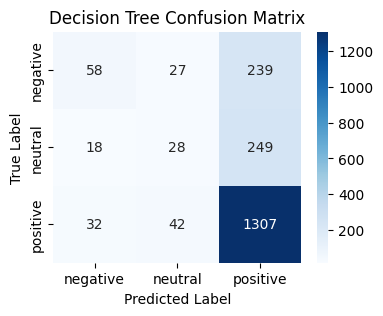

Time taken: 3.93 seconds

Training Random Forest...
Random Forest Accuracy: 0.6980
Random Forest Precision: 0.6424
Random Forest Recall: 0.6980
Random Forest F1 Score: 0.5809


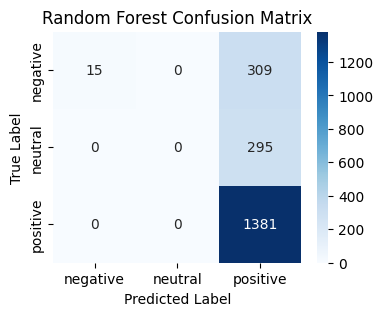

Time taken: 8.32 seconds

Training KNN...
KNN Accuracy: 0.6925
KNN Precision: 0.6410
KNN Recall: 0.6925
KNN F1 Score: 0.6521


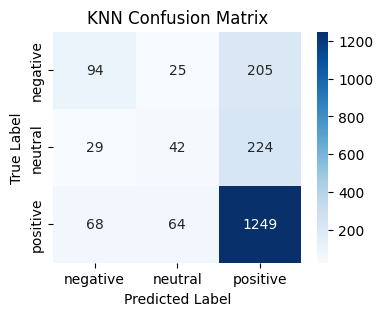

Time taken: 4.92 seconds

Training Naive Bayes...
Naive Bayes Accuracy: 0.7270
Naive Bayes Precision: 0.7290
Naive Bayes Recall: 0.7270
Naive Bayes F1 Score: 0.6403


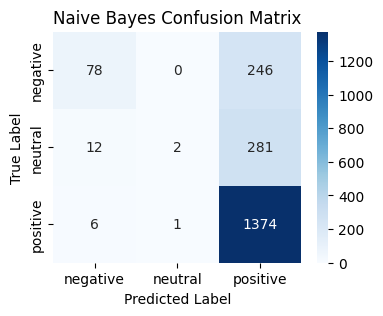

Time taken: 0.33 seconds

Training SVM...
SVM Accuracy: 0.7835
SVM Precision: 0.7502
SVM Recall: 0.7835
SVM F1 Score: 0.7330


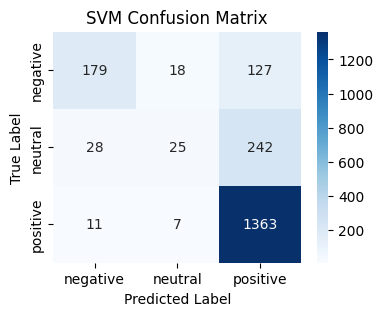

Time taken: 300.10 seconds

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.7600
Gradient Boosting Precision: 0.7267
Gradient Boosting Recall: 0.7600
Gradient Boosting F1 Score: 0.7198


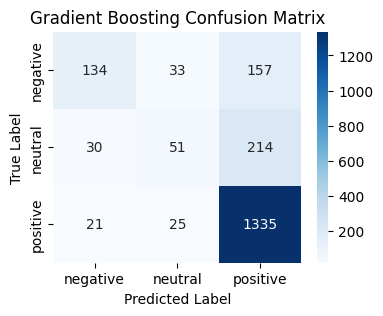

Time taken: 702.08 seconds



In [34]:

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs', C=1.0),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=3),
    'KNN': KNeighborsClassifier(n_neighbors=7, weights='distance', metric='minkowski'),
    'Naive Bayes': MultinomialNB(alpha=1.0),
    'SVM': SVC(C=1.0, kernel='rbf', gamma='scale'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, subsample=0.8)
}

# Store the results in a dictionary
results = {}

# Loop over each model, train, and evaluate
for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()

   # Train the model for other classifiers
    model.fit(X_train, y_train)

   # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store the results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix
    }

    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Precision: {precision:.4f}")
    print(f"{name} Recall: {recall:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")

    # Visualize Confusion Matrix
    class_names=['negative', 'neutral', 'positive']
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    print(f"Time taken: {time.time() - start_time:.2f} seconds\n")


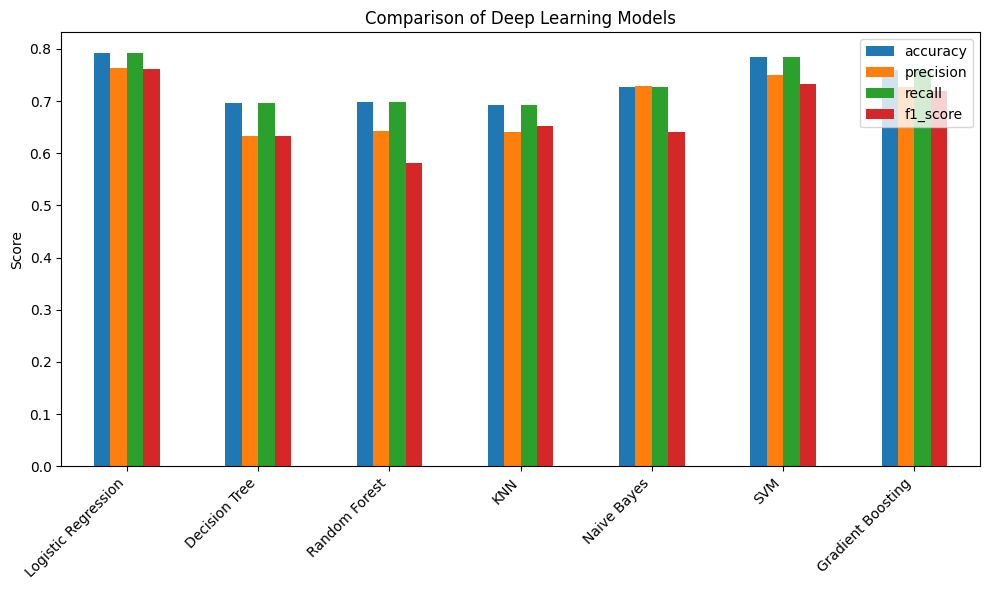

In [35]:

# Convert results into a DataFrame
metrics_df = pd.DataFrame(results).T

# Plot the metrics
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Deep Learning Models')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')  # Adjust x-axis label rotation for better readability
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [36]:


# Example usage with a list of texts and their true labels
example_texts = [
    "I had an amazing experience! The staff was friendly and the food was excellent.",
    "This product exceeded my expectations. I highly recommend it to everyone!",
    "The hotel was okay, neither great nor terrible.",
    "The service was very slow and the room was dirty.",
    "This is just an average product, doing what it is supposed to do.",
    "Absolutely love this place. The atmosphere is great, and the service is outstanding.",
    "Terrible experience! The food was cold, and the staff was rude.",
    "Best decision I ever made. Totally worth it!",
    "I won’t be returning to this place again. Very disappointing.",
    "The movie was phenomenal, one of the best I've seen in years."
]

# True sentiment labels for each example text
true_sentiments = ['positive', 'positive', 'neutral', 'negative', 'neutral',
                   'positive', 'negative', 'positive', 'negative', 'positive']

# Sentiment labels dictionary
sentiment_labels = {0: 'negative', 1: 'neutral', 2: 'positive'}

# Store predictions for each model and each text
all_predictions = {model_name: [] for model_name in models.keys()}

# Function to predict sentiment for all models and texts
def predict_sentiment(new_text, model, tfidf):
    cleaned_text = clean_review(new_text)
    new_text_tfidf = tfidf.transform([cleaned_text]).toarray()
    new_text_tfidf = Normalizer().fit_transform(new_text_tfidf)
    prediction = model.predict(new_text_tfidf)[0]
    return prediction

# Loop through all models and predict sentiment for each example text
for model_name, model in models.items():
    print(f"Predictions for {model_name}:")
    for text in example_texts:
        predicted_sentiment = predict_sentiment(text, model, tfidf)
        predicted_sentiment_label = sentiment_labels[predicted_sentiment]
        all_predictions[model_name].append(predicted_sentiment_label)
        print(f"'{text}' -> {predicted_sentiment_label}")
    print("\n")


Predictions for Logistic Regression:
'I had an amazing experience! The staff was friendly and the food was excellent.' -> positive
'This product exceeded my expectations. I highly recommend it to everyone!' -> positive
'The hotel was okay, neither great nor terrible.' -> negative
'The service was very slow and the room was dirty.' -> negative
'This is just an average product, doing what it is supposed to do.' -> negative
'Absolutely love this place. The atmosphere is great, and the service is outstanding.' -> positive
'Terrible experience! The food was cold, and the staff was rude.' -> negative
'Best decision I ever made. Totally worth it!' -> positive
'I won’t be returning to this place again. Very disappointing.' -> negative
'The movie was phenomenal, one of the best I've seen in years.' -> positive


Predictions for Decision Tree:
'I had an amazing experience! The staff was friendly and the food was excellent.' -> positive
'This product exceeded my expectations. I highly recommend i

In [37]:

# compare predictions with the true sentiments and calculate accuracy
model_accuracies = {}

for model_name, predictions in all_predictions.items():
    accuracy = accuracy_score(true_sentiments, predictions)
    model_accuracies[model_name] = accuracy
    print(f"Accuracy for {model_name}: {accuracy:.4f}")


Accuracy for Logistic Regression: 0.8000
Accuracy for Decision Tree: 0.6000
Accuracy for Random Forest: 0.5000
Accuracy for KNN: 0.8000
Accuracy for Naive Bayes: 0.7000
Accuracy for SVM: 0.8000
Accuracy for Gradient Boosting: 0.6000


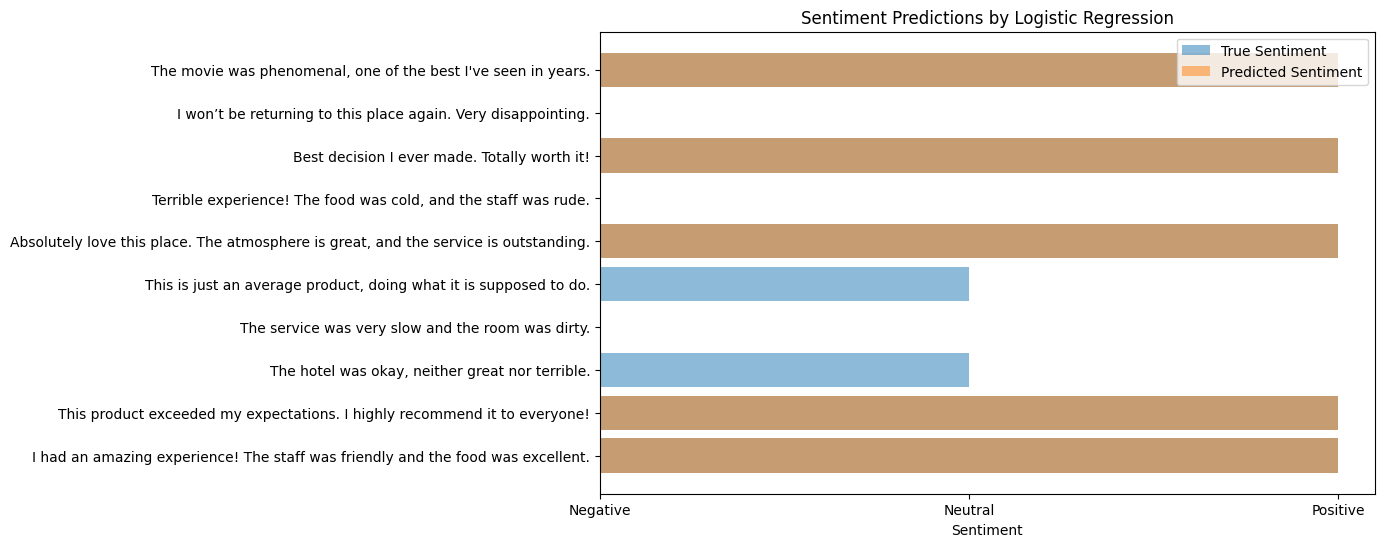

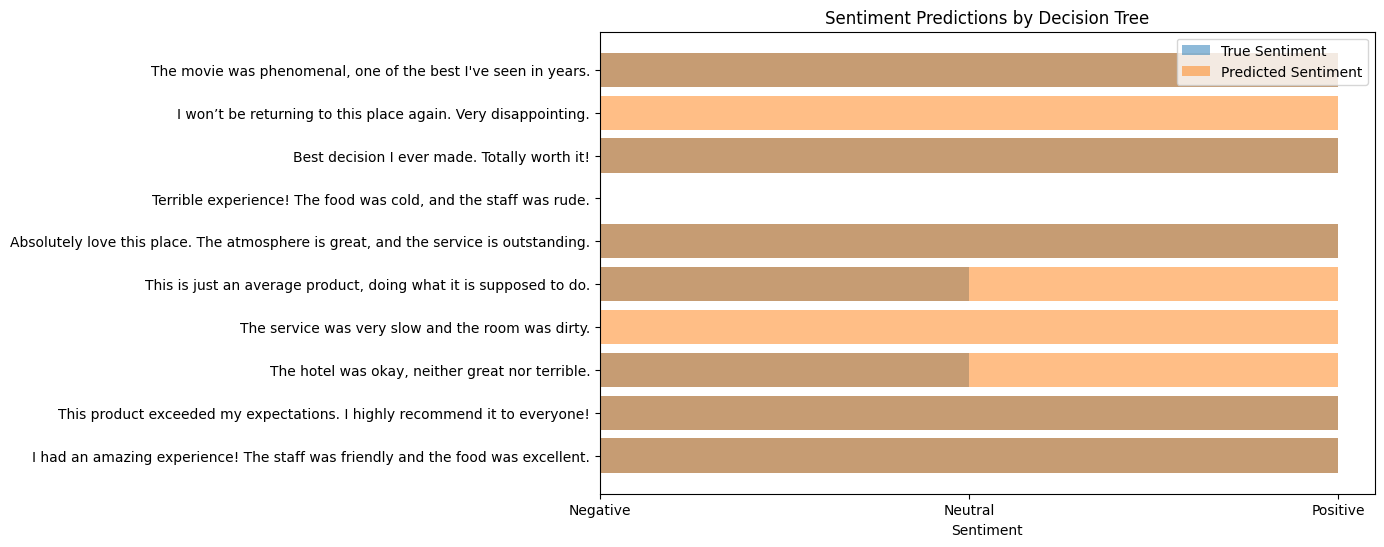

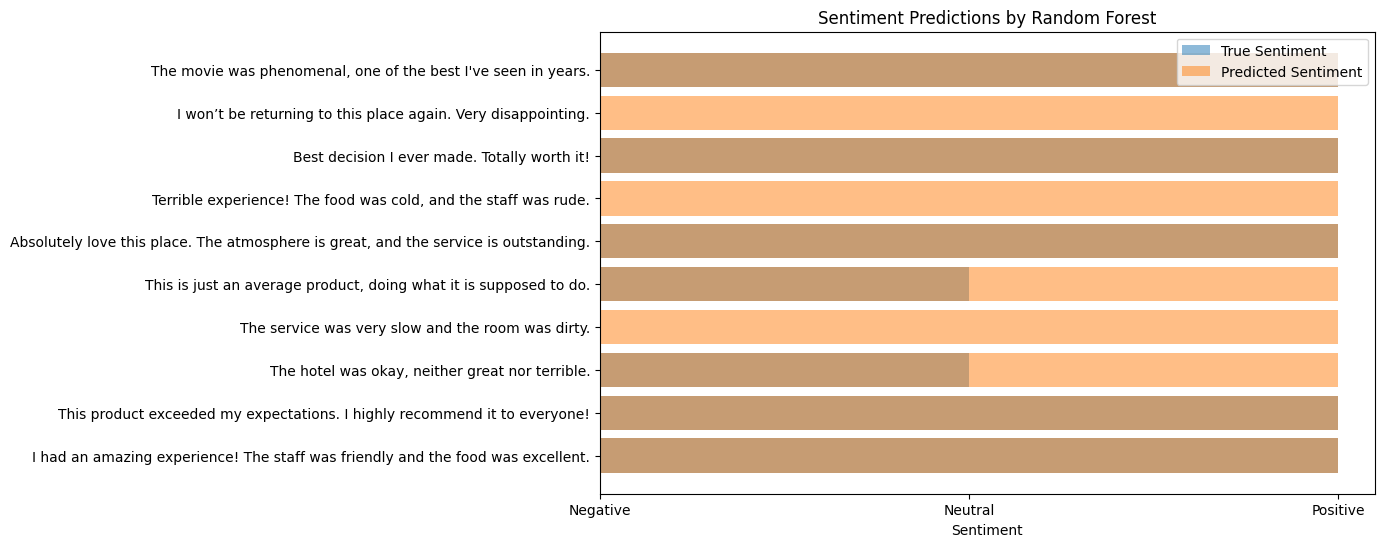

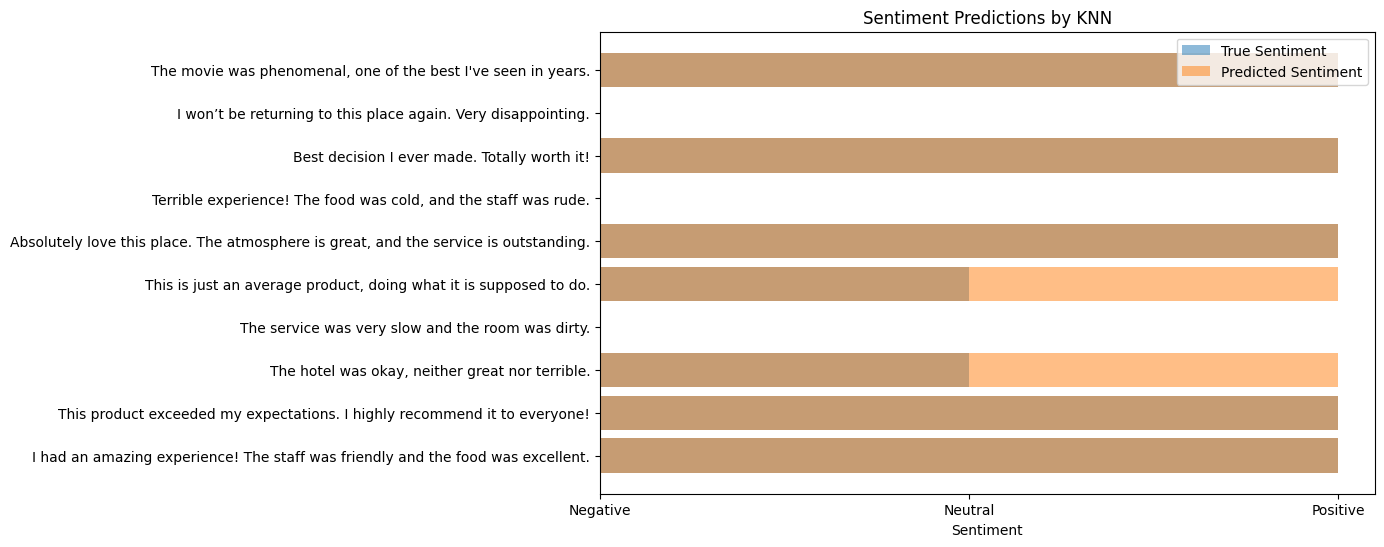

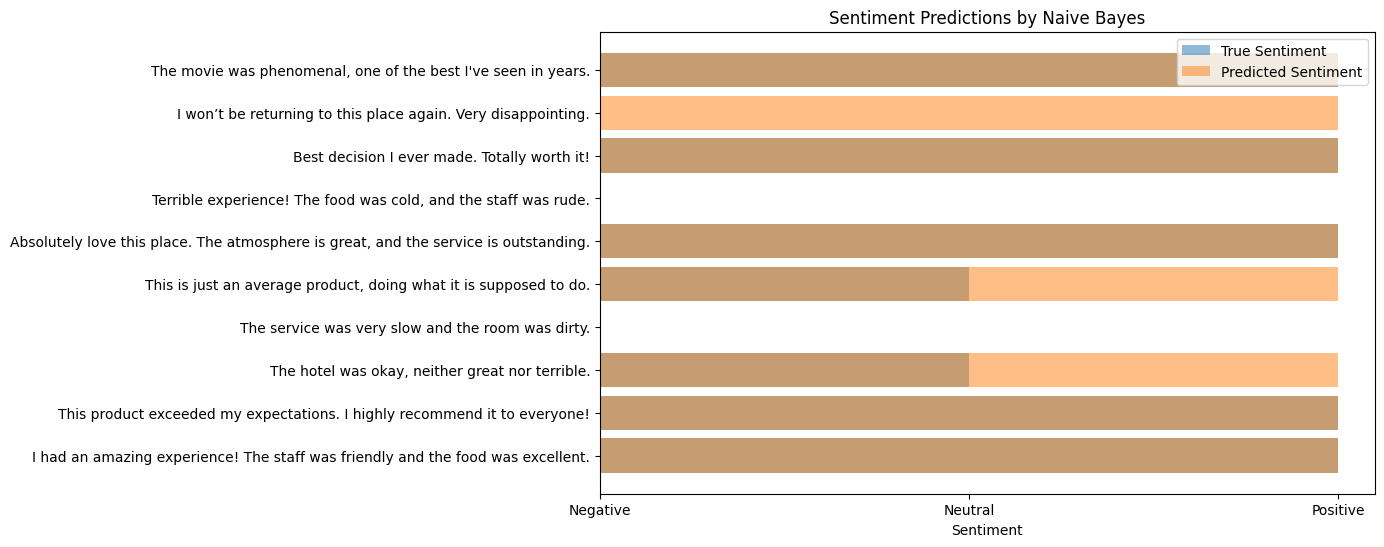

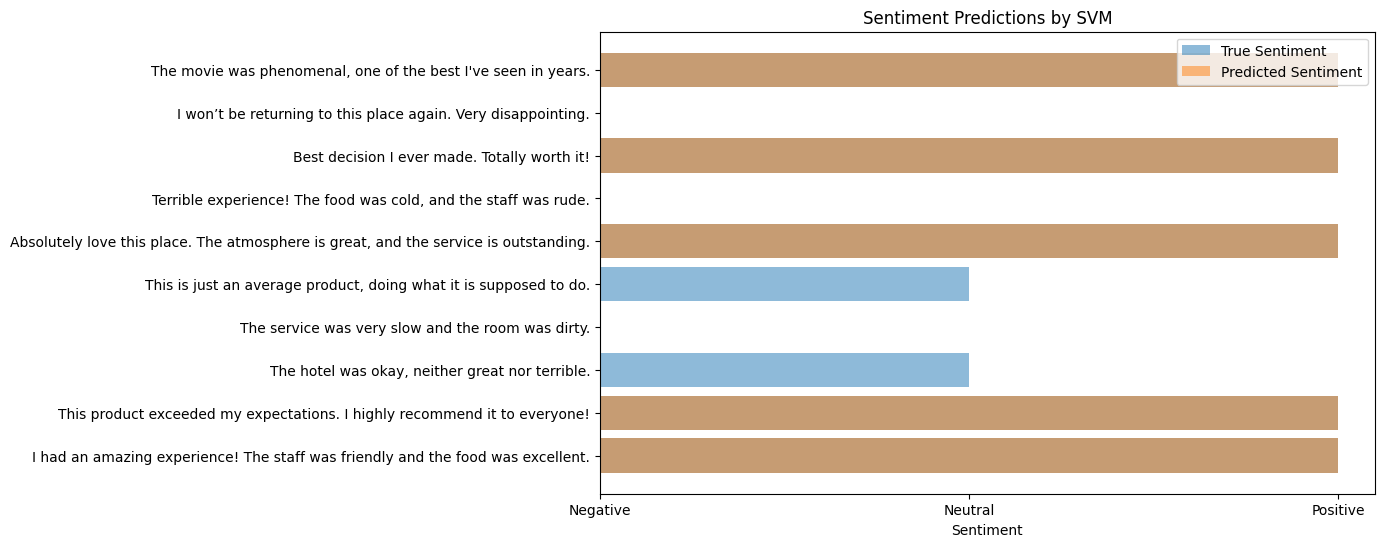

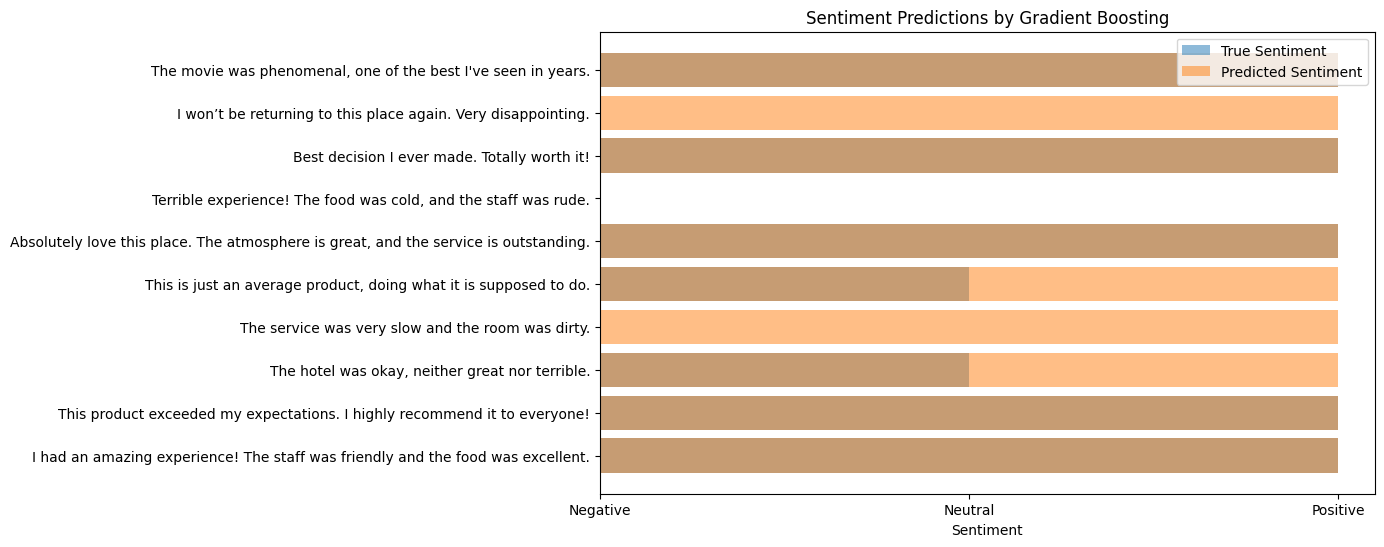

In [38]:

# Visualization: Plot results for each model's predictions against true labels
for model_name, predictions in all_predictions.items():
    plt.figure(figsize=(10, 6))
    true_indices = [list(sentiment_labels.values()).index(p) for p in true_sentiments]
    pred_indices = [list(sentiment_labels.values()).index(p) for p in predictions]

    plt.barh(range(len(example_texts)), true_indices, alpha=0.5, label='True Sentiment')
    plt.barh(range(len(example_texts)), pred_indices, alpha=0.5, label='Predicted Sentiment')

    plt.yticks(range(len(example_texts)), example_texts)
    plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Sentiment')
    plt.title(f"Sentiment Predictions by {model_name}")
    plt.legend()
    plt.show()


# **Deep learning Algorithms**

# Modeling Deep Learning Architectures

In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from transformers import TFBertForSequenceClassification, BertTokenizer

# Early Stopping callback to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

#  function to compile and train a model
def compile_and_train(model, X_train, y_train, X_val, y_val, batch_size=64, epochs=10):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=[early_stopping],
                        verbose=1)
    return model, history


# RNN Model with Dropout and L2 Regularization
def build_rnn_model(vocab_size, embedding_dim=128, input_length=100):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=input_length))
    model.add(SimpleRNN(128, kernel_regularizer=l2(0.001)))  # L2 Regularization
    model.add(Dropout(0.5))  # Dropout to prevent overfitting
    model.add(Dense(3, activation='softmax'))
    return model

# LSTM Model with Dropout and L2 Regularization
def build_lstm_model(vocab_size, embedding_dim=128, input_length=100):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=input_length))
    model.add(LSTM(128, kernel_regularizer=l2(0.001)))  # L2 Regularization
    model.add(Dropout(0.5))  # Dropout
    model.add(Dense(3, activation='softmax'))
    return model

# GRU Model with Dropout and L2 Regularization
def build_gru_model(vocab_size, embedding_dim=128, input_length=100):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=input_length))
    model.add(GRU(128, kernel_regularizer=l2(0.001)))  # L2 Regularization
    model.add(Dropout(0.5))  # Dropout
    model.add(Dense(3, activation='softmax'))
    return model

# CNN for Text Model with Dropout and Batch Normalization
def build_cnn_model(vocab_size, embedding_dim=128, input_length=100):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=input_length))
    model.add(Conv1D(128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.001)))  # L2 Regularization
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())  # Batch Normalization
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))  # Dropout
    model.add(Dense(3, activation='softmax'))
    return model

# BERT Model
def build_bert_model(max_len=100):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
    return bert_model, tokenizer

# Prepare Data for BERT
def prepare_data_for_bert(texts, tokenizer, max_len=100):
    inputs = tokenizer(texts, max_length=max_len, padding='max_length', truncation=True, return_tensors='tf')
    return inputs['input_ids'], inputs['attention_mask']



In [40]:


models = {
    'RNN': build_rnn_model(vocab_size=5000),
    'LSTM': build_lstm_model(vocab_size=5000),
    'GRU': build_gru_model(vocab_size=5000),
    'CNN': build_cnn_model(vocab_size=5000)
}


# Prepare the target variable
y = Data['sentiment_num'].values

# Use train_test_split to split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_word_embeddings, y,
    test_size=0.2,
    random_state=42
)

# Check the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Validation labels shape: {y_val.shape}")


Training data shape: (7999, 100), Training labels shape: (7999,)
Validation data shape: (2000, 100), Validation labels shape: (2000,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Compiling Training and Predicting for 'RNN' 'LSTM' 'GRU' 'CNN' Models

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

results_dl = {}

# Running  Models in One Loop
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Compile and train the model
    model, history = compile_and_train(model, X_train, y_train, X_val, y_val)

    # Make predictions on the validation set
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate evaluation metrics for models
    accuracy = accuracy_score(y_val, y_pred_classes)
    precision = precision_score(y_val, y_pred_classes, average='weighted', zero_division=0)
    recall = recall_score(y_val, y_pred_classes, average='weighted', zero_division=0)
    f1 = f1_score(y_val, y_pred_classes, average='weighted', zero_division=0)


    results_dl[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Displaying Results for Models
print("\nOther Models Comparison:")
for model_name, metrics in results_dl.items():
    print(f"{model_name}:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1_score']:.4f}\n")

Training RNN...
Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.6579 - loss: 1.0024 - val_accuracy: 0.7180 - val_loss: 0.8140
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7848 - loss: 0.6684 - val_accuracy: 0.7270 - val_loss: 0.8030
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8657 - loss: 0.4501 - val_accuracy: 0.7255 - val_loss: 0.8362
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9435 - loss: 0.2687 - val_accuracy: 0.7150 - val_loss: 0.9265
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9811 - loss: 0.1564 - val_accuracy: 0.7125 - val_loss: 1.0730
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9913 - loss: 0.1107 - val_accuracy: 0.6980 - val_loss: 1.2473
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9902 - loss: 0.0956 - val_accuracy: 0.7085 - val_loss: 1.3162
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Training LSTM...
Epoch 1/10
125/125 ━━━━━━

# BERT model

In [42]:
"""
# Split the data for BERT
X_train_reviews, X_val_reviews, y_train, y_val = train_test_split(
    Data['cleaned_reviews'].astype(str).tolist(),
    y,
    test_size=0.2,
    random_state=42
)

# Prepare the data for BERT
bert_model, tokenizer = build_bert_model()
X_train_input_ids, X_train_attention_mask = prepare_data_for_bert(X_train_reviews, tokenizer)
X_val_input_ids, X_val_attention_mask = prepare_data_for_bert(X_val_reviews, tokenizer)

# Compile the BERT model
bert_model.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

print("Training BERT...")

# Fit the model on the training data
bert_model.fit(
    {'input_ids': X_train_input_ids, 'attention_mask': X_train_attention_mask},
    y_train,
    validation_data=({'input_ids': X_val_input_ids, 'attention_mask': X_val_attention_mask}, y_val),
    epochs=1,  # Adjust the number of epochs as needed
    batch_size=64  # Adjust the batch size as needed
)

# Predict using the BERT model on the validation set
y_pred = bert_model.predict({'input_ids': X_val_input_ids, 'attention_mask': X_val_attention_mask}).logits
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics for BERT
accuracy = accuracy_score(y_val, y_pred_classes)
precision = precision_score(y_val, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_val, y_pred_classes, average='weighted', zero_division=0)
f1 = f1_score(y_val, y_pred_classes, average='weighted', zero_division=0)

results_dl = {'BERT': {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}}

print("\nBERT Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")
"""

'\n# Split the data for BERT\nX_train_reviews, X_val_reviews, y_train, y_val = train_test_split(\n    Data[\'cleaned_reviews\'].astype(str).tolist(),\n    y,\n    test_size=0.2,\n    random_state=42\n)\n\n# Prepare the data for BERT\nbert_model, tokenizer = build_bert_model()\nX_train_input_ids, X_train_attention_mask = prepare_data_for_bert(X_train_reviews, tokenizer)\nX_val_input_ids, X_val_attention_mask = prepare_data_for_bert(X_val_reviews, tokenizer)\n\n# Compile the BERT model\nbert_model.compile(optimizer=\'adam\',\n                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),\n                   metrics=[\'accuracy\'])\n\nprint("Training BERT...")\n\n# Fit the model on the training data\nbert_model.fit(\n    {\'input_ids\': X_train_input_ids, \'attention_mask\': X_train_attention_mask},\n    y_train,\n    validation_data=({\'input_ids\': X_val_input_ids, \'attention_mask\': X_val_attention_mask}, y_val),\n    epochs=1,  # Adjust the number of epochs 

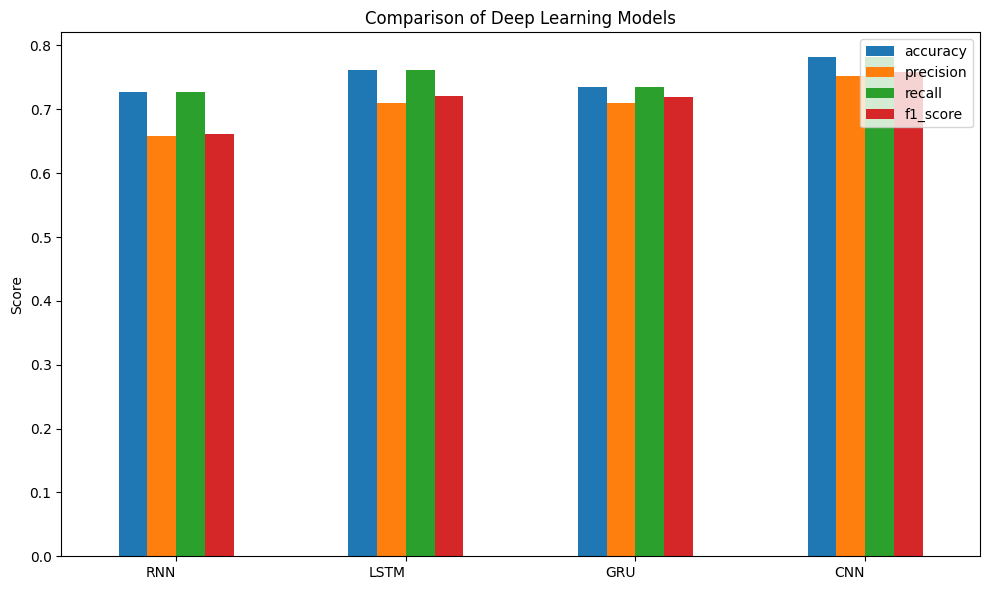

In [43]:


# Convert results into a DataFrame
metrics_df = pd.DataFrame(results_dl).T

# Plot the metrics
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Deep Learning Models')
plt.ylabel('Score')
plt.xticks(rotation=0, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Define sentiment labels
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

# Function to predict sentiment for all deep learning models and texts
def predict_sentiment_dl(new_text, model, model_name, tokenizer=None):

    cleaned_text = clean_review(new_text)
    if model_name == 'BERT':
        # Unpack the BERT model and tokenizer
        bert_model, bert_tokenizer = model

        # Prepare the data for BERT
        input_ids, attention_mask = prepare_data_for_bert([cleaned_text], bert_tokenizer)

        # Predict using the BERT model
        prediction = np.argmax(bert_model.predict({'input_ids': input_ids, 'attention_mask': attention_mask}).logits, axis=1)[0]

    else:
        # For non-BERT models, ensure the tokenizer is available
        if tokenizer is None:
            raise ValueError("Tokenizer must be provided for non-BERT models.")

        # Convert cleaned text to sequences and pad
        sequence = tokenizer.texts_to_sequences([cleaned_text])
        padded_sequence = pad_sequences(sequence, maxlen=100)

        # Predict and get the class for non-BERT models
        prediction = np.argmax(model.predict(padded_sequence), axis=1)[0]

    return prediction



# Store predictions for each deep learning model and each text
dl_all_predictions = {model_name: [] for model_name in models.keys()}

# Before the loop, define and fit the word_tokenizer on your text data:
word_tokenizer = Tokenizer(num_words=5000) # Assuming 5000 words in your vocabulary
word_tokenizer.fit_on_texts(Data['cleaned_reviews'].astype(str).tolist()) # Fit on your cleaned reviews

# Loop through all deep learning models and predict sentiment for each example text
for model_name, model in models.items():
    print(f"Predictions for {model_name}:")
    if model_name == 'BERT':
        bert_model, tokenizer = model  # Unpack BERT model and tokenizer
        for text in example_texts:
            predicted_sentiment = predict_sentiment_dl(text, model, model_name, tokenizer)  # Predict sentiment
            predicted_sentiment_label = sentiment_labels[predicted_sentiment]
            dl_all_predictions[model_name].append(predicted_sentiment_label)
            print(f"'{text}' -> {predicted_sentiment_label}")
        print("\n")
    else:
        # Use the appropriate tokenizer for non-BERT models
        tokenizer = word_tokenizer  # Assuming a pre-trained tokenizer is available
        for text in example_texts:
            predicted_sentiment = predict_sentiment_dl(text, model, model_name, tokenizer)  # Predict sentiment
            predicted_sentiment_label = sentiment_labels[predicted_sentiment]
            dl_all_predictions[model_name].append(predicted_sentiment_label)
            print(f"'{text}' -> {predicted_sentiment_label}")
        print("\n")


Predictions for RNN:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
'I had an amazing experience! The staff was friendly and the food was excellent.' -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
'This product exceeded my expectations. I highly recommend it to everyone!' -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
'The hotel was okay, neither great nor terrible.' -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
'The service was very slow and the room was dirty.' -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
'This is just an average product, doing what it is supposed to do.' -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
'Absolutely love this place. The atmosphere is great, and the service is outstanding.' -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
'Terrible experience! The food was cold, and the staff was rude.' -> Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
'Best decision I ever made. Totally worth it!' -> Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
'I won’t be 

In [45]:

# Compare predictions with the true sentiments and calculate accuracy
dl_model_accuracies = {}

for model_name, predictions in dl_all_predictions.items():
    # Convert the string labels into their corresponding indices for accuracy calculation
    predicted_indices = [list(sentiment_labels.values()).index(p) for p in predictions]
    # Convert true labels to title case to match sentiment_labels
    true_indices = [list(sentiment_labels.values()).index(t.title()) for t in true_sentiments]

    accuracy = accuracy_score(true_indices, predicted_indices)
    dl_model_accuracies[model_name] = accuracy
    print(f"Accuracy for {model_name}: {accuracy:.4f}")


Accuracy for RNN: 0.6000
Accuracy for LSTM: 0.8000
Accuracy for GRU: 0.7000
Accuracy for CNN: 0.9000


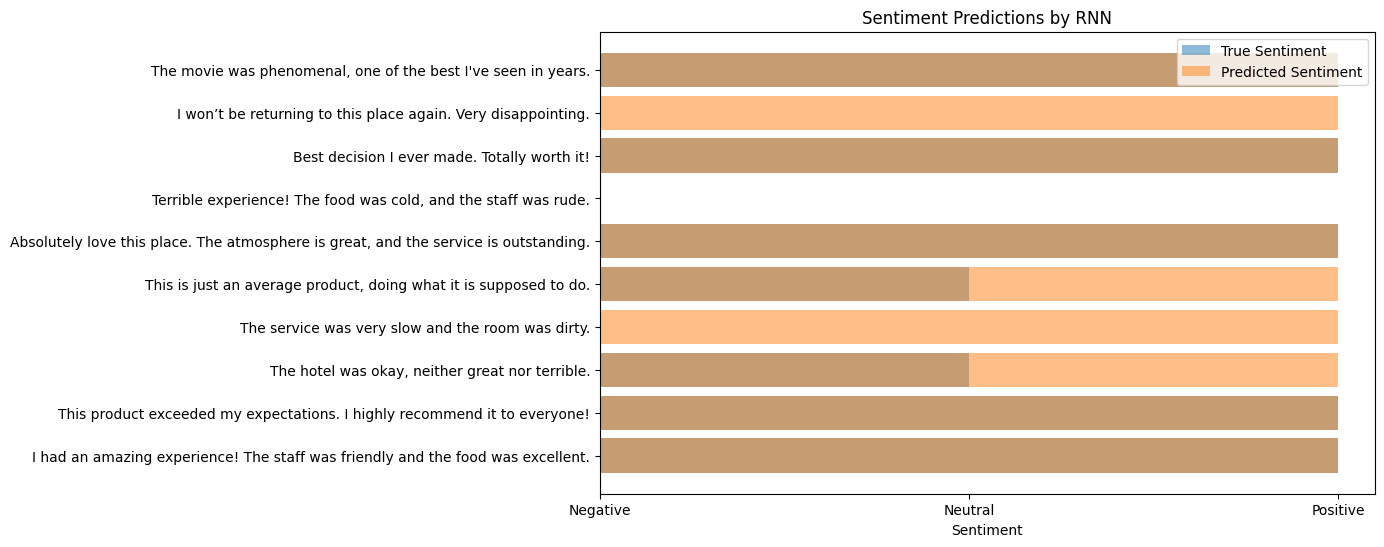

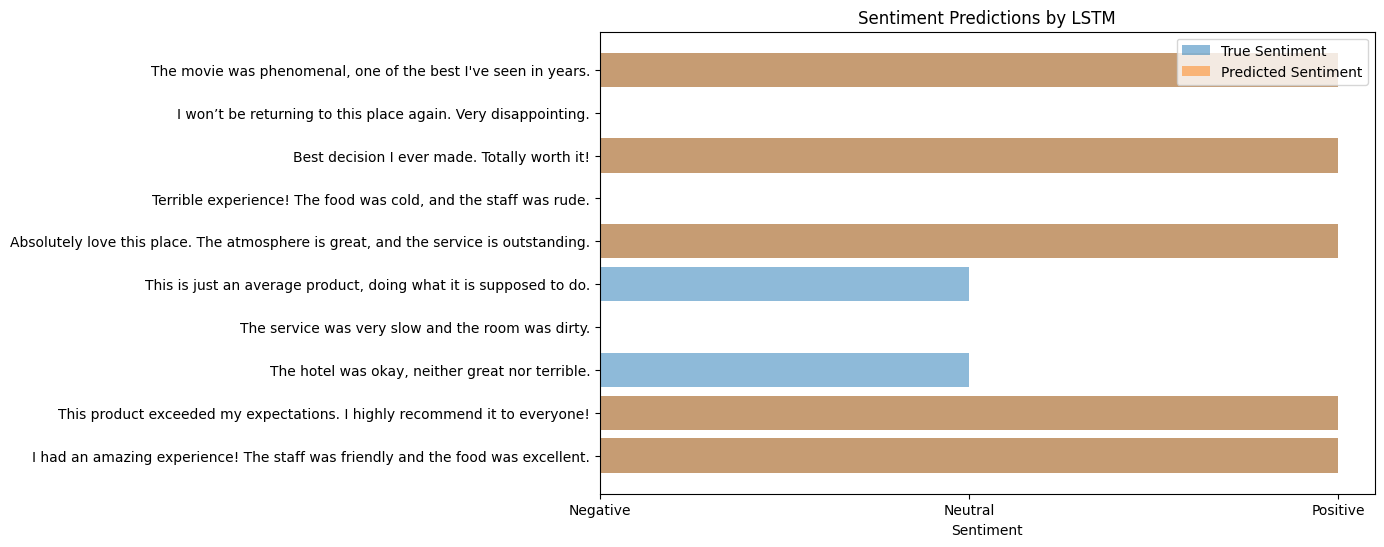

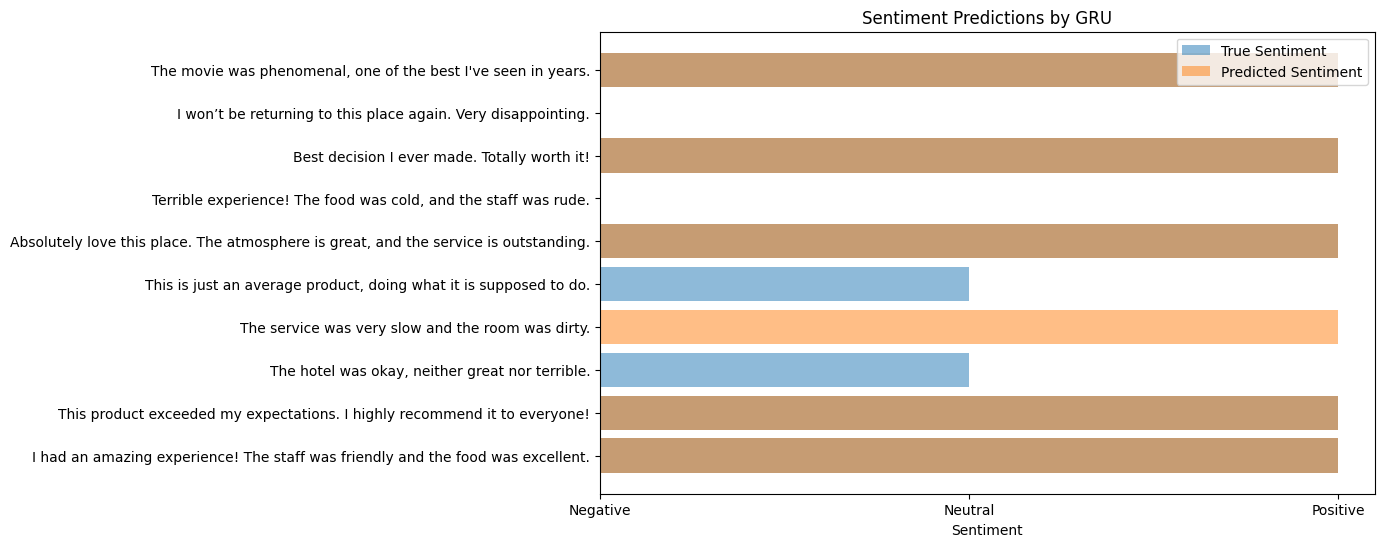

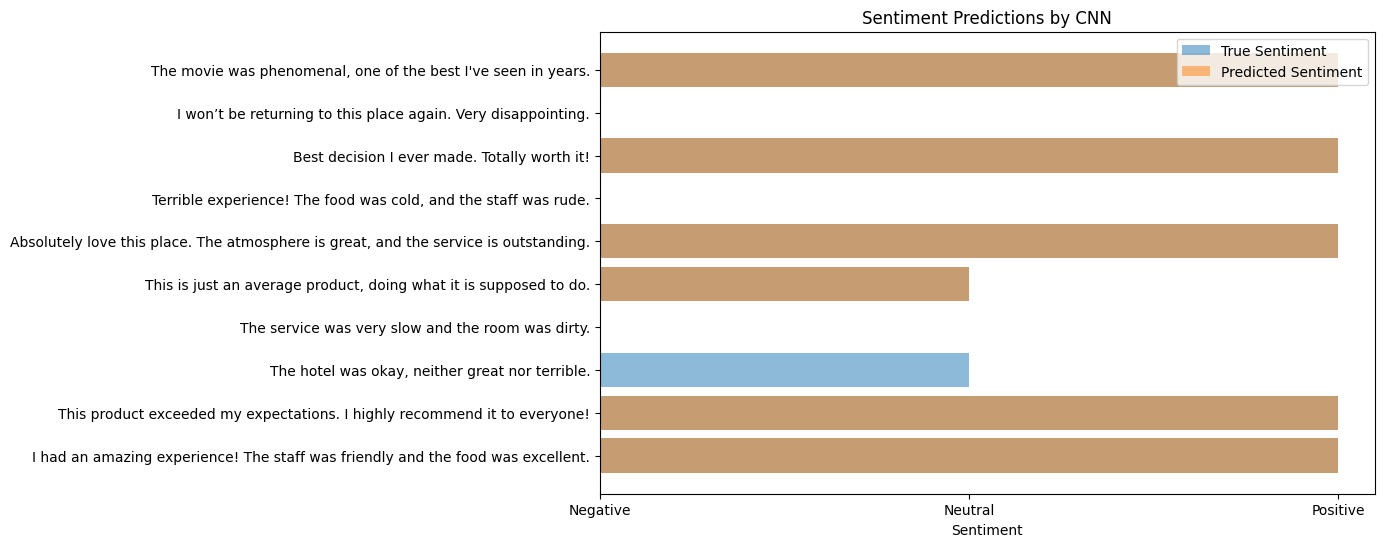

In [46]:


# Visualization: Plot results for each model's predictions against true labels
for model_name, predictions in dl_all_predictions.items():
    plt.figure(figsize=(10, 6))
    # Convert true labels to title case to match sentiment_labels
    true_indices = [list(sentiment_labels.values()).index(t.title()) for t in true_sentiments]  # Convert true labels
    pred_indices = [list(sentiment_labels.values()).index(p) for p in predictions]  # Convert predicted labels

    plt.barh(range(len(example_texts)), true_indices, alpha=0.5, label='True Sentiment')
    plt.barh(range(len(example_texts)), pred_indices, alpha=0.5, label='Predicted Sentiment')

    plt.yticks(range(len(example_texts)), example_texts)
    plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Sentiment')
    plt.title(f"Sentiment Predictions by {model_name}")
    plt.legend()
    plt.show()

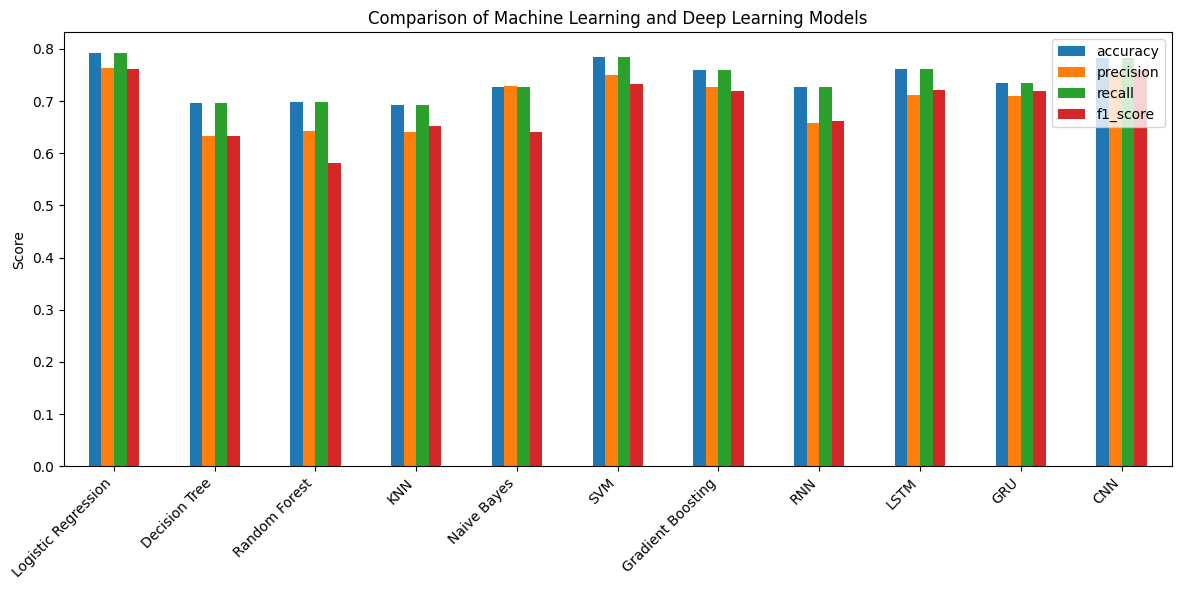

In [47]:

metrics_df = pd.DataFrame(results).T
metrics_dl_df = pd.DataFrame(results_dl).T

# Concatenate the DataFrames for plotting both ML and DL results
all_metrics_df = pd.concat([metrics_df, metrics_dl_df])

# Plot the metrics
all_metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Machine Learning and Deep Learning Models')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
